<h1><center>CSEN1022:Assignment 1</center></h1>
<h3><center>Winter 2021</center></h3>
<hr style="border:2px solid black"> </hr>

## <u> Please don't forget to fill in this data </u>
**Member 1**

Name:Noureldin Ayman Ghazal

GUC-ID:43-15747

Elective Tutorial No.:T07

**Member 2**

Name:Mohamed Ahmed Mohamed Alekhsasy

GUC-ID:43-16620

Elective Tutorial No.:T03

<hr style="border:2px solid black"> </hr>

## Imports (Don't Edit)

In [142]:
# ONLY USE THESE IMPORTS.
# PLEASE DON'T EDIT THIS CELL.
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Read Data (Edit)

In [207]:
import os 


train_plane = np.array([plt.imread('Data/train/airplane/'+str(i)+'.jpg').reshape(-1) for i in range (5000)],dtype = float)
test_plane = np.array([plt.imread('Data/test/airplane/'+str(i)+'.jpg').reshape(-1) for i in range (1000)],dtype = float)
train_car = np.array([plt.imread('Data/train/automobile/'+str(i)+'.jpg').reshape(-1) for i in range (5000)],dtype = float)
test_car = np.array([plt.imread('Data/test/automobile/'+str(i)+'.jpg').reshape(-1) for i in range (1000)],dtype = float)
train_frog = np.array([plt.imread('Data/train/frog/'+str(i)+'.jpg').reshape(-1) for i in range (5000)],dtype = float)
test_frog = np.array([plt.imread('Data/test/frog/'+str(i)+'.jpg').reshape(-1) for i in range (1000)],dtype = float)

train_plane.shape
# return (x_train, y_train), (x_test, y_test)

(5000, 3072)

In [208]:
# train_plane.astype(float)
for i,sample in enumerate(train_plane):
    m= (np.max(sample) - np.min(sample))
    min = np.min(sample)
#     train_plane[i].astype(float)
#     print(type(train_plane[i]))
#     print(sample)
    for j, pixle in enumerate(sample):
        x = pixle /255
#         print(x)
        train_plane[i][j]=x
    
#########################################################################################################
# train_car.astype(float)
for i,sample in enumerate(train_car):
    m= (np.max(sample) - np.min(sample))
    min = np.min(sample)
#     train_car[i].astype(float)
#     print(type(train_plane[i]))
#     print(sample)
    for j, pixle in enumerate(sample):
        x = pixle /255
#         print(x)
        train_car[i][j]=x

    
# #########################################################################################################
    
# train_frog.astype(float)
for i,sample in enumerate(train_frog):
    m= (np.max(sample) - np.min(sample))
    min = np.min(sample)
#     train_frog[i].astype(float)
#     print(type(train_plane[i]))
#     print(sample)
    for j, pixle in enumerate(sample):
        x = pixle /255
#         print(x)
        train_frog[i][j]=x  

In [209]:
for i,sample in enumerate(test_plane):
    m= (np.max(sample) - np.min(sample))
    min = np.min(sample)
#     train_frog[i].astype(float)
#     print(type(train_plane[i]))
#     print(sample)
    for j, pixle in enumerate(sample):
        x = pixle /255
#         print(x)
        test_plane[i][j]=x

    
for i,sample in enumerate(test_car):
    m= (np.max(sample) - np.min(sample))
    min = np.min(sample)
#     train_frog[i].astype(float)
#     print(type(train_plane[i]))
#     print(sample)
    for j, pixle in enumerate(sample):
        x = pixle /255
#         print(x)
        test_car[i][j]=x
    
    
for i,sample in enumerate(test_frog):
    m= (np.max(sample) - np.min(sample))
    min = np.min(sample)
#     train_frog[i].astype(float)
#     print(type(train_plane[i]))
#     print(sample)
    for j, pixle in enumerate(sample):
        x = pixle /255
#         print(x)
        test_frog[i][j]=x

In [210]:
train_plane


array([[0.78431373, 0.79215686, 0.77254902, ..., 0.9254902 , 0.9254902 ,
        0.93333333],
       [0.47058824, 0.45882353, 0.42352941, ..., 0.4627451 , 0.43137255,
        0.34117647],
       [1.        , 0.95686275, 0.98431373, ..., 0.41960784, 0.4745098 ,
        0.02745098],
       ...,
       [0.72941176, 0.71764706, 0.68235294, ..., 0.58823529, 0.49019608,
        0.32941176],
       [0.59215686, 0.60784314, 0.61176471, ..., 0.51372549, 0.46666667,
        0.27058824],
       [0.60784314, 0.62745098, 0.63921569, ..., 0.60784314, 0.63137255,
        0.63137255]])

<hr style="border:2px solid black"> </hr>

## Construct Fischer's Linear Discriminant classifier for each of the 3 classes.
#### Test each classifier on all images in X_Test. 
#### Construct Confusion Matrix.

In [211]:
# Write code here
# Train
train_notPlane = np.append(train_car , train_frog , axis = 0)
mPlane = train_plane.mean(axis = 0)
mNotPlane = train_notPlane.mean(axis = 0)
sPlane = np.zeros((3072,3072))
sNotPlane = np.zeros((3072,3072))
# print(mPlane.shape)
# print(sPlane)
for i in range(len(train_plane)):
#     print(train_plane[i].shape)
    sPlane += (train_plane[i] - mPlane).reshape(3072,1) @ (train_plane[i] - mPlane).reshape(1,3072)
for i in range(len(train_notPlane)):
#     print(train_plane[i].shape)
    sNotPlane += (train_notPlane[i] - mNotPlane).reshape(3072,1) @ (train_notPlane[i] - mNotPlane).reshape(1,3072)

#############

sw_plane_inv = np.linalg.inv(sPlane+sNotPlane)
planeClassifier = (sw_plane_inv @ (mPlane - mNotPlane)).reshape(3072,1)
planeBias = -1* planeClassifier.T @ (mPlane+mNotPlane)/2

print("Plane Class has been trained Successfully !! ")
#############################################################################################################################

train_notCar = np.append(train_plane , train_frog , axis = 0)
mCar = train_car.mean(axis = 0)
mNotCar = train_notCar.mean(axis = 0)
sCar = np.zeros((3072,3072))
sNotCar = np.zeros((3072,3072))
# print(mPlane.shape)
# print(sPlane)
for i in range(len(train_car)):
#     print(train_plane[i].shape)
    sCar += (train_car[i] - mCar).reshape(3072,1) @ (train_car[i] - mCar).reshape(1,3072)
for i in range(len(train_notCar)):
#     print(train_plane[i].shape)
    sNotCar += (train_notCar[i] - mNotCar).reshape(3072,1) @ (train_notCar[i] - mNotCar).reshape(1,3072)

#############

sw_car_inv = np.linalg.inv(sCar+sNotCar)
carClassifier = (sw_car_inv @ (mCar - mNotCar)).reshape(3072,1)
carBias = -1* carClassifier.T @ (mCar+mNotCar)/2

print("CAr Class has been trained Successfully !! ")
#############################################################################################################################

train_notFrog = np.append(train_plane , train_car , axis = 0)
mFrog = train_frog.mean(axis = 0)
mNotGrog = train_notFrog.mean(axis = 0)
sFrog = np.zeros((3072,3072))
sNotFrog = np.zeros((3072,3072))
# print(mPlane.shape)
# print(sPlane)
for i in range(len(train_frog)):
#     print(train_plane[i].shape)
    sFrog += (train_frog[i] - mFrog).reshape(3072,1) @ (train_frog[i] - mFrog).reshape(1,3072)
for i in range(len(train_notFrog)):
#     print(train_plane[i].shape)
    sNotFrog += (train_notFrog[i] - mNotGrog).reshape(3072,1) @ (train_notFrog[i] - mNotGrog).reshape(1,3072)

#############

sw_frog_inv = np.linalg.inv(sFrog+sNotFrog)
frogClassifier = (sw_frog_inv @ (mFrog - mNotGrog)).reshape(3072,1)
frogBias = -1* frogClassifier.T @ (mFrog+mNotGrog)/2

print("Frog Class has been trained Successfully !! ")
#############################################################################################################################




# confusion_matrix = 

Plane Class has been trained Successfully !! 
CAr Class has been trained Successfully !! 
Frog Class has been trained Successfully !! 


In [212]:
# Test

# print(planeBias.shape)
confusion_matrix=[]
wPlane = np.append(planeClassifier , planeBias)
planeTest = np.concatenate((test_plane , np.ones((1000,1))) , axis=1)
wCar = np.append(carClassifier , carBias)
carTest = np.concatenate((test_car , np.ones((1000,1))) , axis=1)
wFrog = np.append(frogClassifier , frogBias)
frogTest = np.concatenate((test_frog , np.ones((1000,1))) , axis=1)
# if(carClassifier.all() == frogClassifier.all()):
#     print("G00G")
planeResults = planeTest @ wPlane
notPlane1 =  planeTest @ wCar
notPlane2 =  planeTest @ wFrog
# print(planeResults[0])
# print(notPlane1[0])
# print(notPlane2[0])

counter1 = 0
counter2 = 0
counter3 = 0
for i in range(len(planeResults)):
#     print(planeResults[i])
#     print(notPlane1[i])
#     print(notPlane2[i])
    if(planeResults[i] > notPlane1[i] and planeResults[i] >notPlane2[i]):
        counter1+=1
    if(notPlane1[i] > planeResults[i] and notPlane1[i] >notPlane2[i]):
        counter2+=1
    if(notPlane2[i] > notPlane1[i] and notPlane2[i] >planeResults[i]):
        counter3+=1

x = [counter1,counter2,counter3]
confusion_matrix += [x]
carResults = carTest @ wCar
notCar1 =  carTest @ wPlane
notCar2 =  carTest @ wFrog  
counter1 = 0
counter2 = 0
counter3 = 0
for i in range(len(planeResults)):
#     print(planeResults[i])
#     print(notPlane1[i])
#     print(notPlane2[i])
    if(carResults[i] > notCar1[i] and carResults[i] >notCar2[i]):
        counter1+=1
    if(notCar1[i] > carResults[i] and notCar1[i] >notCar2[i]):
        counter2+=1
    if(notCar2[i] > notCar1[i] and notCar2[i] >carResults[i]):
        counter3+=1

x = [counter2,counter1,counter3]
confusion_matrix += [x]
frogResults = frogTest @ wFrog
notFrog1 =  frogTest @ wPlane
notFrog2 =  frogTest @ wCar 
# print(counter1)
# print(counter2)
# print(counter3)

counter1 = 0
counter2 = 0
counter3 = 0

for i in range(len(planeResults)):
#     print(planeResults[i])
#     print(notPlane1[i])
#     print(notPlane2[i])
    if(frogResults[i] > notFrog1[i] and frogResults[i] >notFrog2[i]):
        counter1+=1
    if(notFrog1[i] > frogResults[i] and notFrog1[i] >notFrog2[i]):
        counter2+=1
    if(notFrog2[i] > notFrog1[i] and notFrog2[i] >frogResults[i]):
        counter3+=1
x = [counter2,counter3,counter1]
confusion_matrix += [x]

In [213]:
confusion_matrix = np.array(confusion_matrix)
X_test = np.append(test_plane,test_car,axis=0)
X_test= np.append(X_test,test_frog,axis=0)
X_test.shape

(3000, 3072)

## Confusion Matrix (Don't Edit)

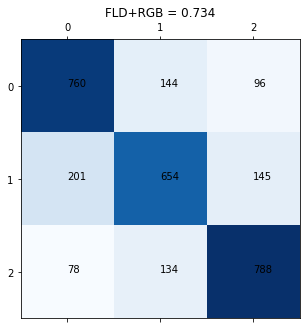

In [214]:
# Make sure the previous cell returns a variable called confusion_matrix
# Plot Confusion Matrix
accuracy = np.diag(confusion_matrix).sum()/X_test.shape[0]
plt.rc('figure', figsize=[5,5])
plt.matshow(confusion_matrix,cmap="Blues")
plt.title('FLD+RGB = {0:0.3f}'.format(accuracy))
for i in range(0,confusion_matrix.shape[0]):
    for j in range(0,confusion_matrix.shape[1]):
        plt.annotate(confusion_matrix[i,j],(j,i))

### Repeat for Grayscale

In [215]:
train_plane = np.array([plt.imread('Data/train/airplane/'+str(i)+'.jpg') for i in range (5000)],dtype = float)
test_plane = np.array([plt.imread('Data/test/airplane/'+str(i)+'.jpg') for i in range (1000)],dtype = float)
train_car = np.array([plt.imread('Data/train/automobile/'+str(i)+'.jpg') for i in range (5000)],dtype = float)
test_car = np.array([plt.imread('Data/test/automobile/'+str(i)+'.jpg') for i in range (1000)],dtype = float)
train_frog = np.array([plt.imread('Data/train/frog/'+str(i)+'.jpg') for i in range (5000)],dtype = float)
test_frog = np.array([plt.imread('Data/test/frog/'+str(i)+'.jpg') for i in range (1000)],dtype = float)



x = np.ones((5000,32,32,1))
y=np.ones((5000,1024))

for index , image in enumerate(train_plane):
    for j , col in  enumerate(image):
        for h, row in  enumerate(col):
            x[index][j][h] = row[0]*0.31+row[1]*0.59+row[2]*0.11
for i in range(len(x)) :
    y[i]=x[i].reshape(-1)
train_plane = y

x = np.ones((5000,32,32,1))
y=np.ones((5000,1024))
for index , image in enumerate(train_car):
    for j , col in  enumerate(image):
        for h, row in  enumerate(col):
            x[index][j][h] = row[0]*0.31+row[1]*0.59+row[2]*0.11
for i in range(len(x)) :
    y[i]=x[i].reshape(-1)
train_car = y

x = np.ones((5000,32,32,1))
y=np.ones((5000,1024))
for index , image in enumerate(train_frog):
    for j , col in  enumerate(image):
        for h, row in  enumerate(col):
            x[index][j][h] = row[0]*0.31+row[1]*0.59+row[2]*0.11
for i in range(len(x)) :
    y[i]=x[i].reshape(-1)
train_frog = y


x = np.ones((1000,32,32,1))
y=np.ones((1000,1024))


for index , image in enumerate(test_plane):
    for j , col in  enumerate(image):
        for h, row in  enumerate(col):
            x[index][j][h] = row[0]*0.31+row[1]*0.59+row[2]*0.11
for i in range(len(x)) :
    y[i]=x[i].reshape(-1)
test_plane = y

x = np.ones((1000,32,32,1))
y=np.ones((1000,1024))
for index , image in enumerate(test_car):
    for j , col in  enumerate(image):
        for h, row in  enumerate(col):
            x[index][j][h] = row[0]*0.31+row[1]*0.59+row[2]*0.11
for i in range(len(x)) :
    y[i]=x[i].reshape(-1)
test_car = y

x = np.ones((1000,32,32,1))
y=np.ones((1000,1024))
for index , image in enumerate(test_frog):
    for j , col in  enumerate(image):
        for h, row in  enumerate(col):
            x[index][j][h] = row[0]*0.31+row[1]*0.59+row[2]*0.11
for i in range(len(x)) :
    y[i]=x[i].reshape(-1)
test_frog = y


In [216]:
# train_plane.astype(float)
for i,sample in enumerate(train_plane):
    m= (np.max(sample) - np.min(sample))
    min = np.min(sample)
#     train_plane[i].astype(float)
#     print(type(train_plane[i]))
#     print(sample)
    for j, pixle in enumerate(sample):
        x = pixle /255
#         print(x)
        train_plane[i][j]=x
    
#########################################################################################################
# train_car.astype(float)
for i,sample in enumerate(train_car):
    m= (np.max(sample) - np.min(sample))
    min = np.min(sample)
#     train_car[i].astype(float)
#     print(type(train_plane[i]))
#     print(sample)
    for j, pixle in enumerate(sample):
        x = pixle /255
#         print(x)
        train_car[i][j]=x

    
# #########################################################################################################
    
# train_frog.astype(float)
for i,sample in enumerate(train_frog):
    m= (np.max(sample) - np.min(sample))
    min = np.min(sample)
#     train_frog[i].astype(float)
#     print(type(train_plane[i]))
#     print(sample)
    for j, pixle in enumerate(sample):
        x = pixle /255
#         print(x)
        train_frog[i][j]=x  

In [217]:
for i,sample in enumerate(test_plane):
    m= (np.max(sample) - np.min(sample))
    min = np.min(sample)
#     train_frog[i].astype(float)
#     print(type(train_plane[i]))
#     print(sample)
    for j, pixle in enumerate(sample):
        x = pixle /255
#         print(x)
        test_plane[i][j]=x

    
for i,sample in enumerate(test_car):
    m= (np.max(sample) - np.min(sample))
    min = np.min(sample)
#     train_frog[i].astype(float)
#     print(type(train_plane[i]))
#     print(sample)
    for j, pixle in enumerate(sample):
        x = pixle /255
#         print(x)
        test_car[i][j]=x
    
    
for i,sample in enumerate(test_frog):
    m= (np.max(sample) - np.min(sample))
    min = np.min(sample)
#     train_frog[i].astype(float)
#     print(type(train_plane[i]))
#     print(sample)
    for j, pixle in enumerate(sample):
        x = pixle /255
#         print(x)
        test_frog[i][j]=x


In [218]:
print(train_plane)
train_plane.shape

[[0.7954902  0.80341176 0.80737255 ... 0.94352941 0.95541176 0.93560784]
 [0.46317647 0.46317647 0.47231373 ... 0.48709804 0.45701961 0.4354902 ]
 [0.98282353 0.97690196 0.96866667 ... 0.47301961 0.43270588 0.41305882]
 ...
 [0.72458824 0.71443137 0.6905098  ... 0.5394902  0.51572549 0.50780392]
 [0.6094902  0.60862745 0.60862745 ... 0.46435294 0.46039216 0.46435294]
 [0.62894118 0.62894118 0.62894118 ... 0.63039216 0.63039216 0.63039216]]


(5000, 1024)

In [219]:
# Write code here
# Train
train_notPlane = np.append(train_car , train_frog , axis = 0)
mPlane = train_plane.mean(axis = 0)
mNotPlane = train_notPlane.mean(axis = 0)
sPlane = np.zeros((1024,1024))
sNotPlane = np.zeros((1024,1024))
# print(mPlane.shape)
# print(sPlane)
for i in range(len(train_plane)):
    sPlane += (train_plane[i] - mPlane).reshape(1024,1) @ (train_plane[i] - mPlane).reshape(1,1024)
    
for i in range(len(train_notPlane)):
    sNotPlane += (train_notPlane[i] - mNotPlane).reshape(1024,1) @ (train_notPlane[i] - mNotPlane).reshape(1,1024)
    
# print(sPlane,'\n',"HFGF",'\n')
# print(sNotPlane)
# print(train_plane.shape)

#############

sw_plane_inv = np.linalg.inv(sPlane+sNotPlane)
planeClassifier = (sw_plane_inv @ (mPlane - mNotPlane)).reshape(1024,1)
planeBias = -1* planeClassifier.T @ (mPlane+mNotPlane)/2

print("Plane Class has been trained Successfully !! ")
#############################################################################################################################

train_notCar = np.append(train_plane , train_frog , axis = 0)
mCar = train_car.mean(axis = 0)
mNotCar = train_notCar.mean(axis = 0)
sCar = np.zeros((1024,1024))
sNotCar = np.zeros((1024,1024))
# print(mPlane.shape)
# print(sPlane)
for i in range(len(train_car)):
#     print(train_plane[i].shape)
    sCar += (train_car[i] - mCar).reshape(1024,1) @ (train_car[i] - mCar).reshape(1,1024)
for i in range(len(train_notCar)):
#     print(train_plane[i].shape)
    sNotCar += (train_notCar[i] - mNotCar).reshape(1024,1) @ (train_notCar[i] - mNotCar).reshape(1,1024)

#############

sw_car_inv = np.linalg.inv(sCar+sNotCar)
carClassifier = (sw_car_inv @ (mCar - mNotCar)).reshape(1024,1)
carBias = -1* carClassifier.T @ (mCar+mNotCar)/2

print("CAr Class has been trained Successfully !! ")
#############################################################################################################################

train_notFrog = np.append(train_plane , train_car , axis = 0)
mFrog = train_frog.mean(axis = 0)
mNotGrog = train_notFrog.mean(axis = 0)
sFrog = np.zeros((1024,1024))
sNotFrog = np.zeros((1024,1024))
# print(mPlane.shape)
# print(sPlane)
for i in range(len(train_frog)):
#     print(train_plane[i].shape)
    sFrog += (train_frog[i] - mFrog).reshape(1024,1) @ (train_frog[i] - mFrog).reshape(1,1024)
for i in range(len(train_notFrog)):
#     print(train_plane[i].shape)
    sNotFrog += (train_notFrog[i] - mNotGrog).reshape(1024,1) @ (train_notFrog[i] - mNotGrog).reshape(1,1024)

#############

sw_frog_inv = np.linalg.inv(sFrog+sNotFrog)
frogClassifier = (sw_frog_inv @ (mFrog - mNotGrog)).reshape(1024,1)
frogBias = -1* frogClassifier.T @ (mFrog+mNotGrog)/2

print("Frog Class has been trained Successfully !! ")
#############################################################################################################################




# # confusion_matrix = 

Plane Class has been trained Successfully !! 
CAr Class has been trained Successfully !! 
Frog Class has been trained Successfully !! 


In [220]:
# Test

# print(planeBias.shape)
confusion_matrix=[]
wPlane = np.append(planeClassifier , planeBias)
planeTest = np.concatenate((test_plane , np.ones((1000,1))) , axis=1)
wCar = np.append(carClassifier , carBias)
carTest = np.concatenate((test_car , np.ones((1000,1))) , axis=1)
wFrog = np.append(frogClassifier , frogBias)
frogTest = np.concatenate((test_frog , np.ones((1000,1))) , axis=1)
# if(carClassifier.all() == frogClassifier.all()):
#     print("G00G")
planeResults = planeTest @ wPlane
notPlane1 =  planeTest @ wCar
notPlane2 =  planeTest @ wFrog
# print(planeResults[0])
# print(notPlane1[0])
# print(notPlane2[0])

counter1 = 0
counter2 = 0
counter3 = 0
for i in range(len(planeResults)):
#     print(planeResults[i])
#     print(notPlane1[i])
#     print(notPlane2[i])
    if(planeResults[i] > notPlane1[i] and planeResults[i] >notPlane2[i]):
        counter1+=1
    if(notPlane1[i] > planeResults[i] and notPlane1[i] >notPlane2[i]):
        counter2+=1
    if(notPlane2[i] > notPlane1[i] and notPlane2[i] >planeResults[i]):
        counter3+=1

x = [counter1,counter2,counter3]
confusion_matrix += [x]
carResults = carTest @ wCar
notCar1 =  carTest @ wPlane
notCar2 =  carTest @ wFrog  
counter1 = 0
counter2 = 0
counter3 = 0
for i in range(len(planeResults)):
#     print(planeResults[i])
#     print(notPlane1[i])
#     print(notPlane2[i])
    if(carResults[i] > notCar1[i] and carResults[i] >notCar2[i]):
        counter1+=1
    if(notCar1[i] > carResults[i] and notCar1[i] >notCar2[i]):
        counter2+=1
    if(notCar2[i] > notCar1[i] and notCar2[i] >carResults[i]):
        counter3+=1

x = [counter2,counter1,counter3]
confusion_matrix += [x]
frogResults = frogTest @ wFrog
notFrog1 =  frogTest @ wPlane
notFrog2 =  frogTest @ wCar 
# print(counter1)
# print(counter2)
# print(counter3)

counter1 = 0
counter2 = 0
counter3 = 0

for i in range(len(planeResults)):
#     print(planeResults[i])
#     print(notPlane1[i])
#     print(notPlane2[i])
    if(frogResults[i] > notFrog1[i] and frogResults[i] >notFrog2[i]):
        counter1+=1
    if(notFrog1[i] > frogResults[i] and notFrog1[i] >notFrog2[i]):
        counter2+=1
    if(notFrog2[i] > notFrog1[i] and notFrog2[i] >frogResults[i]):
        counter3+=1
x = [counter2,counter3,counter1]
confusion_matrix += [x]

In [221]:
confusion_matrix = np.array(confusion_matrix)
X_test = np.append(test_plane,test_car,axis=0)
X_test= np.append(X_test,test_frog,axis=0)
X_test.shape

(3000, 1024)

## Confusion Matrix (Don't Edit)

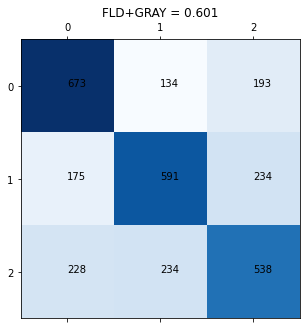

In [222]:
# Make sure the previous cell returns a variable called confusion_matrix
# Plot Confusion Matrix
accuracy = np.diag(confusion_matrix).sum()/X_test.shape[0]
plt.rc('figure', figsize=[5,5])
plt.matshow(confusion_matrix,cmap="Blues")
plt.title('FLD+GRAY = {0:0.3f}'.format(accuracy))
for i in range(0,confusion_matrix.shape[0]):
    for j in range(0,confusion_matrix.shape[1]):
        plt.annotate(confusion_matrix[i,j],(j,i))

<hr style="border:2px solid black"> </hr>

## Comment on the change of accuracy between RGB and Grayscale
##########

The accuracy drops in the grey scale image as the switch cause our chanels to drop from 3 chanels to only one chanel which is equivalent to losing some of our data  
The frog class is the most affected class as the green color was a dominant feature in the frog class 
...
...
...

##########
<hr style="border:2px solid black"> </hr>